<a href="https://colab.research.google.com/github/Om-2001/Python-Projects/blob/main/AIrbnb%20EDA%20Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb EDA Project by Om Kalbhor**



**Breakdown of this Notebook:**
1. Importing libraries
2. Loading dataset
3. Data Wrangling
4. EDA

**Project Summary**

Objective:
The aim of this project was to conduct an Exploratory Data Analysis (EDA) on the Airbnb dataset to gain insights into various aspects such as pricing patterns, room types, host behavior, and geographical trends. The analysis was performed to assist in understanding the underlying trends, relationships, and potential factors influencing the Airbnb listings.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA Project 1/"
dataset = pd.read_csv(file_path + "Airbnb NYC 2019.csv")

In [4]:
df = dataset.copy()

### DATASET SUMMARY

1. **id**: Unique identifier for each Airbnb listing.
2. **name**: The name or title of the listing.
3. **host_id**: Unique identifier for the host of the Airbnb listing.
4. **host_name**: The name of the host.
5. **neighbourhood_group(location)**: The broader geographical area or group of neighborhoods that the listing is located in.
6. **neighbourhood(area)**: The specific neighborhood where the listing is situated.
7. **latitude**: The latitude coordinate of the listing's location.
8. **longitude**: The longitude coordinate of the listing's location.
9. **room_type**: The type of room or accommodation offered (e.g., entire home/apartment, private room, shared room).
10. **price**: The price per night for the listing.
11. **minimum_nights**: The minimum number of nights a guest is required to stay.
12. **number_of_reviews**: The total number of reviews the listing has received.
13. **last_review**: The date of the last review received for the listing.
14. **reviews_per_month**: The average number of reviews the listing receives per month.
15. **calculated_host_listings_count**: The count of listings managed by the host.
16. **availability_365**: The number of days the listing is available for booking within a year (365 days).

This dataset provides information about Airbnb listings, including details about the listing itself, the host, location, pricing, and availability, as well as review-related information. Analyzing this data can offer insights into the Airbnb market in a specific area.

### Understanding Data

In [5]:
'''
Documentation:

1. name has 16, host_name has 27 nan values
    this count is small and we can perform dropna
2. last_review and reviews_per_month has 10052 nan values
    which is logically correct as number_of_review on that id is 0
    Thus no need to change anything (reason can be very less visited)
3. Drop latitude, longitude, last_review, reviews_per_month columns
    as no potential use seen at this time
4. neighbourhood_group and neighbourhood can be renamed as location and area
    respectivly for convinience
5. room_type, location and area datatypes updated to category as they have less
    unique values (3, 5, 221) and will help in analysis
6. No duplicate values found
7. structure of columns and rows perfect
8. Price cannot be zero drop that rows

'''

# AFTER THIS CAN START EDA

'\nDocumentation:\n\n1. name has 16, host_name has 27 nan values\n    this count is small and we can perform dropna\n2. last_review and reviews_per_month has 10052 nan values\n    which is logically correct as number_of_review on that id is 0\n    Thus no need to change anything (reason can be very less visited)\n3. Drop latitude, longitude, last_review, reviews_per_month columns\n    as no potential use seen at this time\n4. neighbourhood_group and neighbourhood can be renamed as location and area\n    respectivly for convinience\n5. room_type, location and area datatypes updated to category as they have less\n    unique values (3, 5, 221) and will help in analysis\n6. No duplicate values found\n7. structure of columns and rows perfect\n8. Price cannot be zero drop that rows\n\n'

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.shape

(48895, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.duplicated().sum() # no duplicate rows

0

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
for i in df.columns.tolist():
  print('"',i, '"',"Unique values : ",df[i].nunique())

" id " Unique values :  48895
" name " Unique values :  47905
" host_id " Unique values :  37457
" host_name " Unique values :  11452
" neighbourhood_group " Unique values :  5
" neighbourhood " Unique values :  221
" latitude " Unique values :  19048
" longitude " Unique values :  14718
" room_type " Unique values :  3
" price " Unique values :  674
" minimum_nights " Unique values :  109
" number_of_reviews " Unique values :  394
" last_review " Unique values :  1764
" reviews_per_month " Unique values :  937
" calculated_host_listings_count " Unique values :  47
" availability_365 " Unique values :  366


### DATA WRANGLING

In [14]:
df = df.rename(columns={'neighbourhood_group':'location', 'neighbourhood' : 'area'})

In [15]:
df.drop(df.columns[[6, 7, 12, 13]], axis = 1, inplace = True)

In [16]:
df = df.dropna(subset = ['name', 'host_name']) # 37 records deleted

In [17]:
df = df[df['price'] > 10]

In [18]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
location                          0
area                              0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
df['room_type'] = df['room_type'].astype('category')
df['location'] = df['location'].astype('category')
df['area'] = df['area'].astype('category')

In [20]:
df.sample(5)

,id,name,host_id,host_name,location,area,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
7256,5318322,"Triplex 3 bedroom Private Apt, Deck, yard & pond!",8354345,Gennaro,Brooklyn,Gowanus,Entire home/apt,495,2,95,1,285
823,292266,Sunny and spacious bedroom,1513294,Urszula,Brooklyn,Bushwick,Private room,50,60,17,2,74
30717,23764303,Charming Studio on Upper East Side,178224519,Lisa,Manhattan,Upper East Side,Entire home/apt,100,30,0,8,320
23371,18914730,IDEALLY LOCATED COZY COTTAGE,1776707,Luis,Bronx,Throgs Neck,Entire home/apt,95,1,266,1,345
20992,16620607,Spacious and Modern 2 Bedroom Apartment,109725962,Erika,Brooklyn,Bushwick,Entire home/apt,11,2,113,1,261


## EDA

Few questions to ans:

1. What percent of room types available in each location?
2. Avg price for each room type?
3. Preferred Area to stay by guest in every location?
4. Host Preferred location for business?
5. Which area has the highest average price for listings
6. Relation between number_of_reviews and prices
7. Is there any relationship between the availability of listings and their prices
8. Do certain neighborhood groups have higher minimum night requirements
9. Top 10 Hosts
10. Total number of nights spend in per room type
11. Max and Min price wrt every location and room_type


Categorical columns :
1. location
2. area
3. room_type

Numerical columns (important) :
1. price
2. minimum_nights
3. number_of_reviews
4. calculated_host_listing_count
5. availibility_365
6. min_amount_spend

### Which room type is preferred more with respect to location
Conclusion :
Shared rooms are very less preferred every location and other are as respect to output

In [21]:
pd.crosstab(df['location'], df['room_type'], normalize = 'index')*100

room_type,Entire home/apt,Private room,Shared room
location,,,
Bronx,34.774609,59.797608,5.427783
Brooklyn,47.568995,50.383581,2.047425
Manhattan,60.952161,36.838456,2.209383
Queens,36.989931,59.512454,3.497615
Staten Island,47.184987,50.402145,2.412869


<Axes: xlabel='room_type', ylabel='location'>

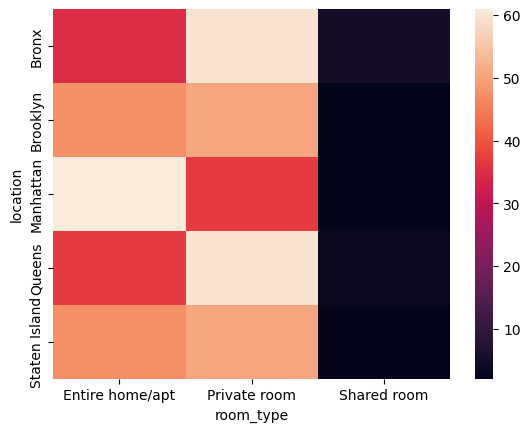

In [22]:
sns.heatmap(pd.crosstab(df['location'], df['room_type'], normalize = 'index')*100)

### Avg price for each room type

Conclusion :
Prices are as expected
entire home > private room > shared romm

In [23]:
avg_room_price = df.groupby('room_type')['price'].mean().reset_index()
avg_room_price

,room_type,price
0,Entire home/apt,211.879333
1,Private room,89.851196
2,Shared room,70.301299


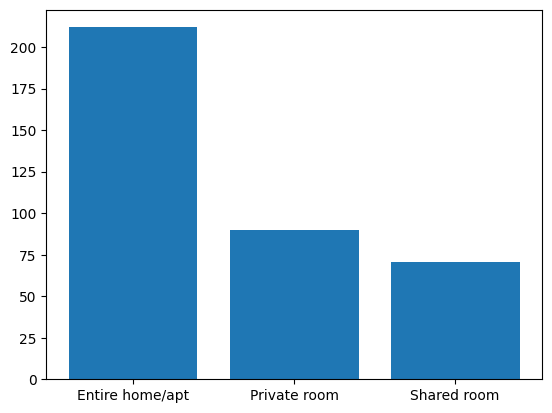

In [24]:
plt.bar(avg_room_price['room_type'], avg_room_price['price'])
plt.show()

### Preferred area to stay in every location in terms of most visited

Conclusion : this are areas prefered by guests to stay in every location respect to the number of guests stayed there early

In [25]:
result = df.groupby(['location', 'area']).size().reset_index(name='count')
result.loc[result.groupby('location')['count'].idxmax()]

,location,area,count
111,Bronx,Kingsbridge,70
435,Brooklyn,Williamsburg,3915
536,Manhattan,Harlem,2654
667,Queens,Astoria,900
1070,Staten Island,St. George,48


### Host preffered location for business

Conclusion : Host prefered location for business wrt number of listing is manhattan

In [26]:
pref_location = df.groupby('location')['calculated_host_listings_count'].sum().reset_index()
pref_location.sort_values('calculated_host_listings_count', ascending = False)

,location,calculated_host_listings_count
2,Manhattan,277033
1,Brooklyn,45860
3,Queens,22999
0,Bronx,2430
4,Staten Island,865


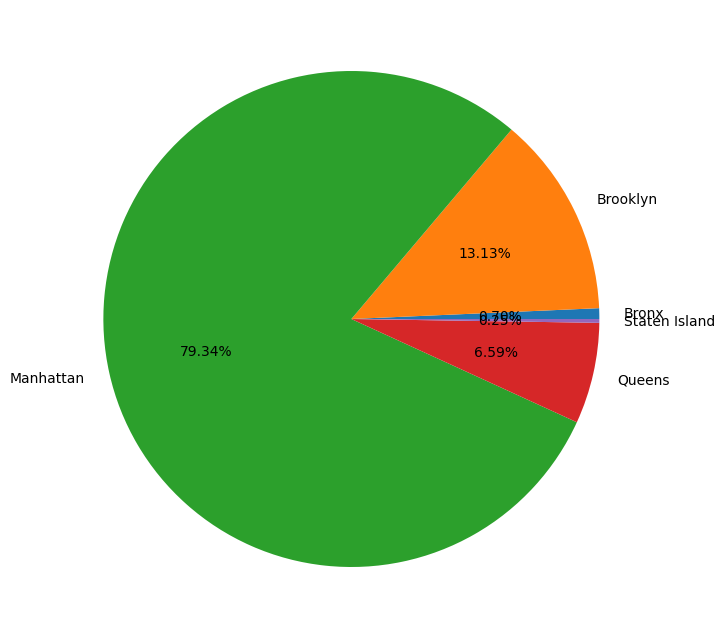

In [27]:
plt.figure(figsize=(8,10))
plt.pie(pref_location['calculated_host_listings_count'], labels = pref_location['location'], autopct='%.2f%%')
plt.show()

### Which avg has the highest average price for listings

Conclusion : This are top 5 areas with highest avg price

In [28]:
df.groupby('area')['price'].mean().sort_values(ascending = False).reset_index(name='price').head()

,area,price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909


### Relation between number_of_reviews and prices

Conclusion : There is no significant relation between both (expected that prices would rise as number of reviews)

This can be because the reviews could be negative of average

In [29]:
# to tackle outliers the price is taken maximum of boxplot(75% + 1.5*IQR)
filtered_df = df[df['price'] < 350]
filtered_df['number_of_reviews'].corr(filtered_df['price'])

-0.027637796728076775

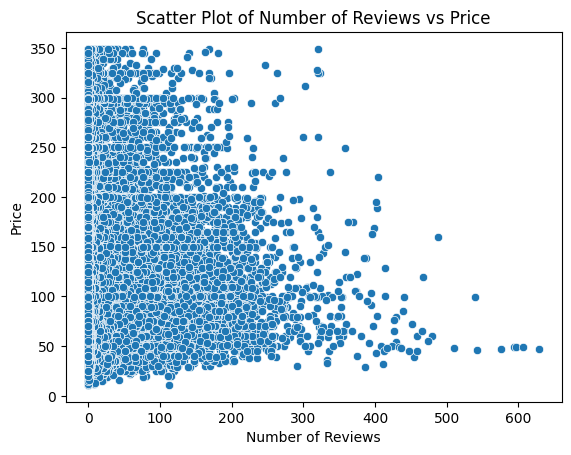

In [30]:
sns.scatterplot(x='number_of_reviews', y='price', data=filtered_df)
plt.title('Scatter Plot of Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

### Is there any relationship between the availability of listings and their prices

Conclusion : No such relation found Expected to have higher prices where there is low availibility

In [31]:
filtered_df = df[df['price'] < 350]
filtered_df['availability_365'].corr(filtered_df['price'])

0.07059584796750223

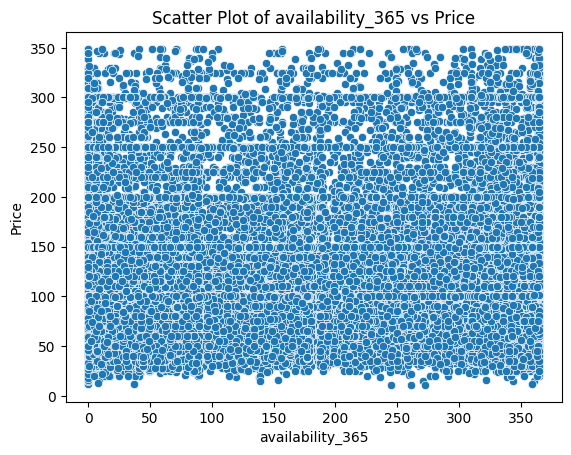

In [32]:
sns.scatterplot(x='availability_365', y='price', data=filtered_df)
plt.title('Scatter Plot of availability_365 vs Price')
plt.xlabel('availability_365')
plt.ylabel('Price')
plt.show()

### Do certain neighborhood groups have higher minimum night requirements

Conclusion : manhatten have high avg minimum nights requirement

In [33]:
results = df.groupby('location')['minimum_nights'].mean().reset_index(name='avg_min_nights').sort_values('avg_min_nights', ascending = False)
results = results.round(2)
results

,location,avg_min_nights
2,Manhattan,8.54
1,Brooklyn,6.06
3,Queens,5.18
4,Staten Island,4.83
0,Bronx,4.57


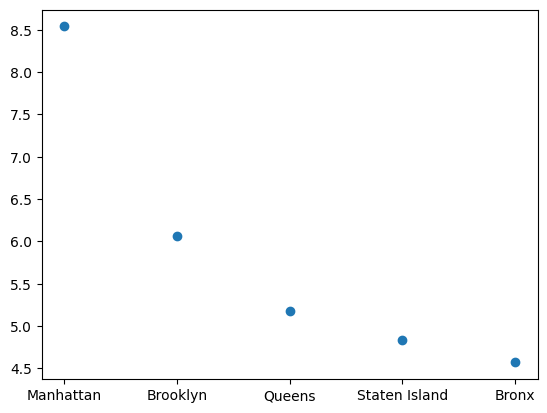

In [34]:
plt.scatter(results['location'], results['avg_min_nights'])
plt.show()

### Top 10 hosts

In [35]:
results = df.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending = False).reset_index(name = 'num_listing').head(10)
results

,host_name,num_listing
0,Sonder (NYC),327
1,Blueground,232
2,Kara,121
3,Kazuya,103
4,Jeremy & Laura,96
5,Sonder,96
6,Corporate Housing,91
7,Ken,87
8,Pranjal,65
9,Vida,52


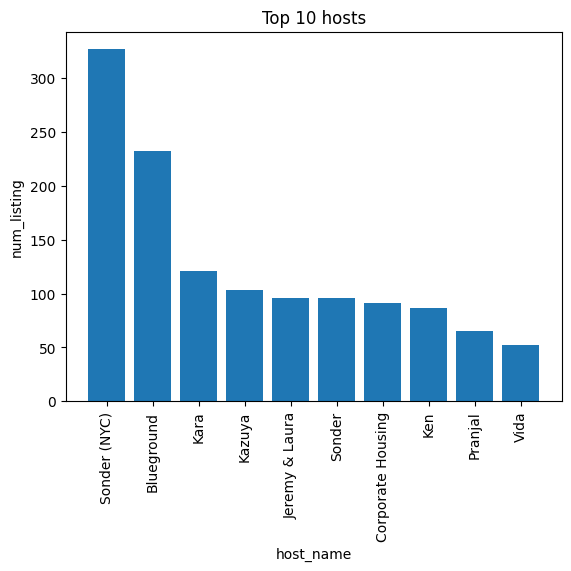

In [36]:
plt.bar(results['host_name'], results['num_listing'])
plt.xticks(rotation='vertical')
plt.xlabel('host_name')
plt.ylabel('num_listing')
plt.title('Top 10 hosts')
plt.show()

### Total number of nights spend per room type

In [37]:
results = df.groupby('room_type')['minimum_nights'].sum().reset_index(name='nights_spend').sort_values('nights_spend', ascending = False)
results

,room_type,nights_spend
0,Entire home/apt,215032
1,Private room,119984
2,Shared room,7448


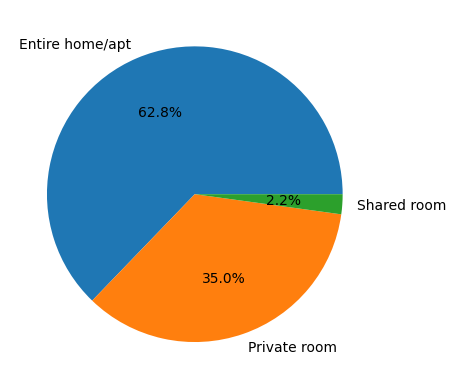

In [38]:
plt.pie(results['nights_spend'], labels = results['room_type'], autopct = '%.1f%%')
plt.show()

### Max and Min price wrt every location and room_type

In [39]:
df['price'].describe()

count    48830.000000
mean       152.824411
std        240.275543
min         11.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [40]:
results = df.groupby(['location', 'room_type'])['price'].agg(['min', 'max'])
results

min    max
location      room_type                  
Bronx         Entire home/apt   28   1000
              Private room      21   2500
              Shared room       20    800
Brooklyn      Entire home/apt   11  10000
              Private room      15   7500
              Shared room       15    725
Manhattan     Entire home/apt   11  10000
              Private room      12   9999
              Shared room       20   1000
Queens        Entire home/apt   15   2600
              Private room      20  10000
              Shared room       11   1800
Staten Island Entire home/apt   48   5000
              Private room      20    300
              Shared room       13    150

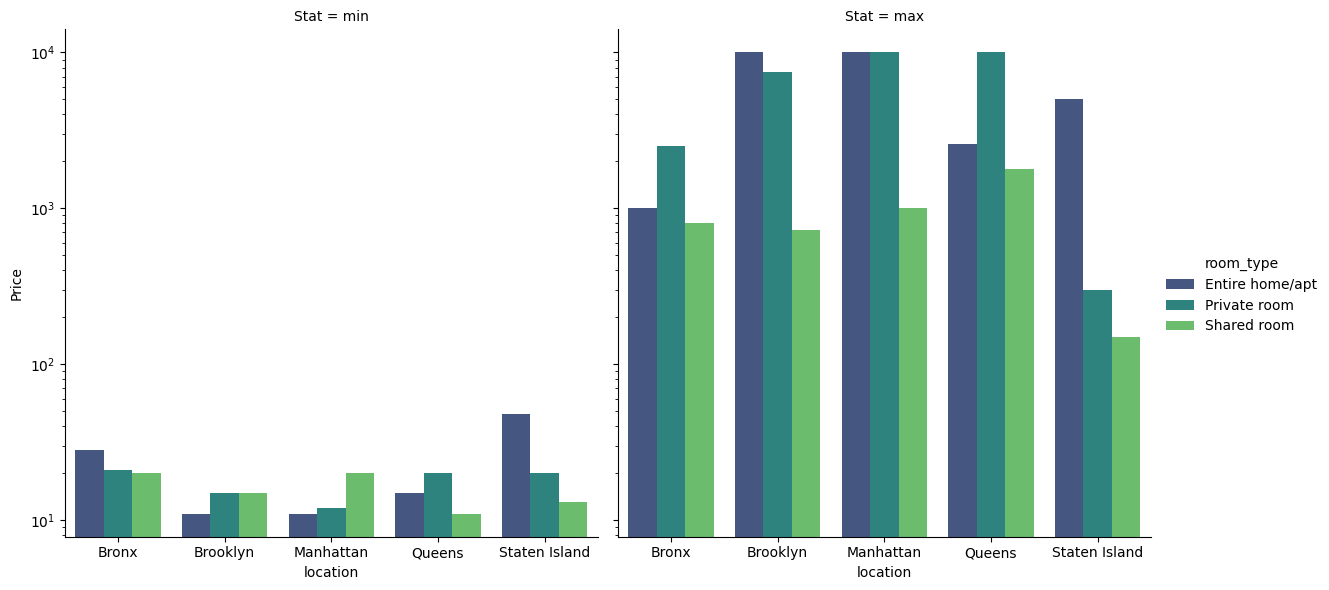

In [41]:
results = results.reset_index()
# Melt the DataFrame to convert it to long format for catplot
results_melted = results.melt(id_vars=['location', 'room_type'], var_name='Stat', value_name='Price')

# Create a catplot with a logarithmic y-axis
g = sns.catplot(x='location', y='Price', hue='room_type', col='Stat', kind='bar', data=results_melted, height=6, palette='viridis')
g.set(yscale="log")

# Conclusions

1. Shared rooms are the least prefered irrespective of the location.
2. Private rooms are preferred over Entire house except in Manhatten.
3. Manhatten is the most preferred location for business by hosts.
4. Prices of different room types (Entire apt, private room, shared room) has an expected trend : Entire apt > private room > shared room
5. There is no relation between price and reviews (Expected that high reviews would attract high prices)
6. There is no relation between price and availability (Expected that low Availability would attract high prices)
7. There is high percentage listing of Entire House/apt room_type (62%)